In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

This file is about extracting text information from an image scan.

Using easyOCR from PyTorch, we managed to create a computer vision model that reads text in an image, line by line.

We have given few images attached to this file, for testing purposes and below functions,

*   "overlay_ocr_text" determines how the result is formed and explains its format.
*   "store_ocr_text" defines the engineering steps required prior to changes the extarcted text into desired input format for our prediction model.


In [ ]:
#!pip install -q torch==1.0.0 torchvision
!pip install easyocr

     |████████████████████████████████| 63.2MB 79kB/s 


In [ ]:
import torch
print(torch.__version__)

1.9.0+cu102


In [ ]:
import cv2
import numpy as np
import torchvision
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
im1_path = 'test_one_one.jpg'
im2_path = 'tt-1.jpg'
im3_path = 'tt-2.png'
im4_path = 'final_result.jpg'


In [ ]:
def recognize_text(img_path):
  reader = easyocr.Reader(['en'])
  return reader.readtext(img_path)

In [ ]:
result = recognize_text(im4_path)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


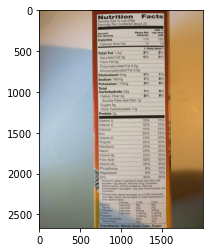

In [ ]:
img_1 = cv2.imread(im4_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

plt.imshow(img_1)

In [ ]:
# detailed review on result
def overlay_ocr_text(img_path, save_name):

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  dpi = 80
  fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
  plt.figure()
  f,axarr = plt.subplots(1,2,figsize = (fig_width,fig_height))
  axarr[0].imshow(img) 

  result = recognize_text(img_path)

  for(bbox, text, prob) in result:
    if prob >=0.5:
      print(f'Detected text: {text} (Probability: {prob:.2f})')

      (top_left, top_right, bottom_right, bottom_left) = bbox
      top_left = (int(top_left[0]), int(top_left[1]))
      bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

      cv2.rectangle(img = img, pt1 = top_left, pt2 = bottom_right, color = (255,0,0), thickness = 10)

      cv2.putText(img = img, text = text, org = (top_left[0], top_left[1]-10), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (255,0,0), thickness = 8)
      
    axarr[1].imshow(img)
    plt.savefig(f'./{save_name}_overlay.jpg', bbox_inches = 'tight')

In [ ]:
import re

In [ ]:
# storing the text and engineering the input features.
def store_ocr_text(img_path):

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  obs_text = []
  result = recognize_text(img_path)
  # print(result)
  for (bbox, text, prob) in result:
    if prob >=0.5:
      obs_text.append(text)
# abs_text = set(obs_text)


  newlist = [word.lower() for line in obs_text for word in line.split()]
  newlist = [word.lower() for line in newlist for word in line.split(',')]
  newlist = [word.lower() for line in newlist for word in line.split(';')]
  newlist = [word.lower() for line in newlist for word in line.split(':')]
  # print(newlist.count('milk'))

  counting_dict = {}
  set = ('milk','wheat', 'egg', 'bread', 'pasta', 'pastry', 'tortilla', 'croissant','scone','cake', 'pancake','jaffa','mayo', 'yoghurt', 'custard', 'cream	cheese','fish' , 'peanut','sesame')
  for i in set:
      if newlist.count(i) > 0:
        counting_dict[i] = 1
      else:
        counting_dict[i] = 0
  print(counting_dict)
   

In [ ]:
store_ocr_text(im1_path) # whether observed the ingredient in the food label (1) or not (0)

{'milk': 1, 'wheat': 0, 'egg': 0, 'bread': 0, 'Sugar': 0, 'pastry': 0, 'tortilla': 0, 'croissant': 0, 'scone': 0, 'cake': 0, 'pancake': 0, 'jaffa': 0, 'mayo': 0, 'yoghurt': 1, 'custard': 0, 'cream\tcheese': 0, 'fish': 0, 'peanut': 0, 'sesame': 0}
